### 1. Import libraris and datasets

In [39]:
#Basic libraries
import pandas as pd 
import numpy as np 

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

#NLTK libraries
import nltk
import re
import string
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [40]:
# Read the datasets

clean_onion = pd.read_csv('./processed_onion.csv')
clean_notonion = pd.read_csv('./processed_notonion.csv')

### 2. EDA

In this section, we will complete do exploratory data analysis on news such as ngram analysis and understand which are all the words, context which is most likely found in fake news.

In [41]:
def bar_plot(x, y, title, color):    
    
    # Set up barplot 
    plt.figure(figsize=(9,5))
    g=sns.barplot(x, y, color = color)    
    ax=g

    # Label the graph
    plt.title(title, fontsize = 15)
    plt.xticks(fontsize = 10)

    # Enable bar values
    # Code modified from http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
    # create a list to collect the plt.patches data
    totals = []

    # find the values and append to list
    for p in ax.patches:
        totals.append(p.get_width())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for p in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(p.get_width()+.3, p.get_y()+.38, \
                int(p.get_width()), fontsize=10)

#### __2a. Count of most active authors for fake and true news__

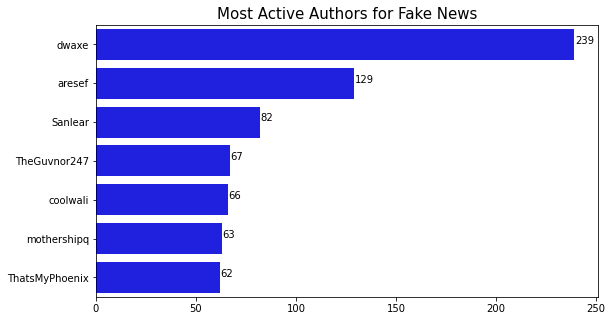

In [42]:
# Set x values: # of posts with more than 100 post

df_authors = clean_onion['author'].value_counts() 
df_authors = df_authors[df_authors > 50].sort_values(ascending=False)

# Set y values: Authors 
df_authors_index = list(df_authors.index)

# Call function
bar_plot(df_authors.values, df_authors_index, 'Most Active Authors for Fake News', 'b') 

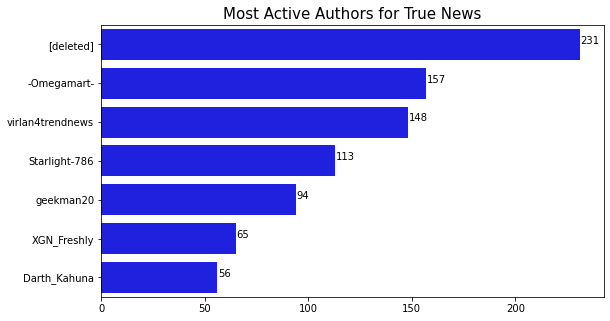

In [43]:
# Set x values: # of posts with more than 100 post
df_authors = clean_notonion['author'].value_counts() 
df_authors = df_authors[df_authors > 50].sort_values(ascending=False)

# Set y values: Authors 
df_authors_index = list(df_authors.index)

# Call function
bar_plot(df_authors.values, df_authors_index, 'Most Active Authors for True News', 'b') 

Surprisingly that the authors from fake news are more active compared to the real news authors, which 239 post from 'dware' as compared to 'Omegamart' post 157 news for the year 2021. Also, we noticed that the no. of authors for fake news are more than those authors posted true news in term of posts more than 50 during the year. The `deleted` in the column of `author` is indicated that the user in the subreddit have deleted their account while the posts are still maintained in the subreddit. So the highest count for the author in `r/theonion` is `Omegammart`.

#### __2b. Count of most active domain for fake and true news__

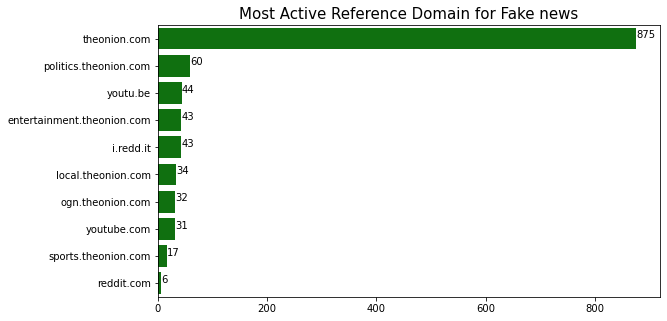

In [44]:
# Set x values: # of posts for fake news
df_domain = clean_onion['domain'].value_counts() 
df_domain = df_domain.sort_values(ascending=False).head(10)

# Set y values: Authors 
df_domain_index = list(df_domain.index)

# Call function
bar_plot(df_domain.values, df_domain_index, 'Most Active Reference Domain for Fake news', 'g') 

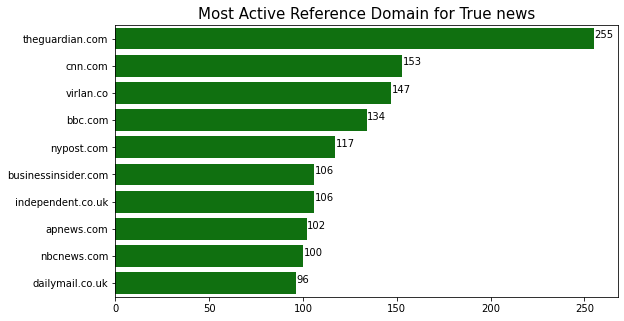

In [45]:
# Set x values: # of posts for fake news
df_domain = clean_notonion['domain'].value_counts() 
df_domain = df_domain.sort_values(ascending=False).head(10)

# Set y values: Authors 
df_domain_index = list(df_domain.index)

# Call function
bar_plot(df_domain.values, df_domain_index, 'Most Active Reference Domain for True news', 'g') 

From the findings, we found that most of the posts for fake news were from `theonion.com` which posted 878 news while the true news are mostly from `theguardian.com` posted 256 news.It's not surpise that fake news are mostly posted by the `TheOnion` company.

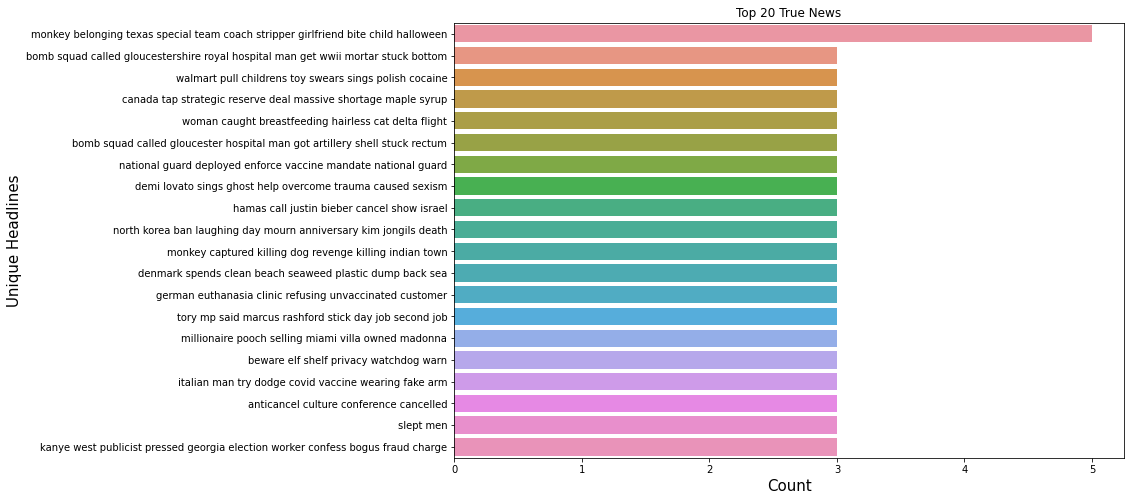

In [46]:
# Look for the popular post for the headlines for true news

headlines = clean_notonion['clean_text'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(headlines.values, headlines.index)
plt.xlabel("Count", fontsize=15)
plt.ylabel("Unique Headlines", fontsize=15)
plt.title("Top 20 True News")
plt.show()

This is true that the most popular headlines for the year 2021 is regading to a Texas football photographer, Jeff Banks' girlfriend, the Pole Assassin, has this pet monkey, Gia, who performs pole dancing routines with her. The monkey reportedly bit a kid and had to be pried off the child during a Halloween incident dated 3 November 2021.

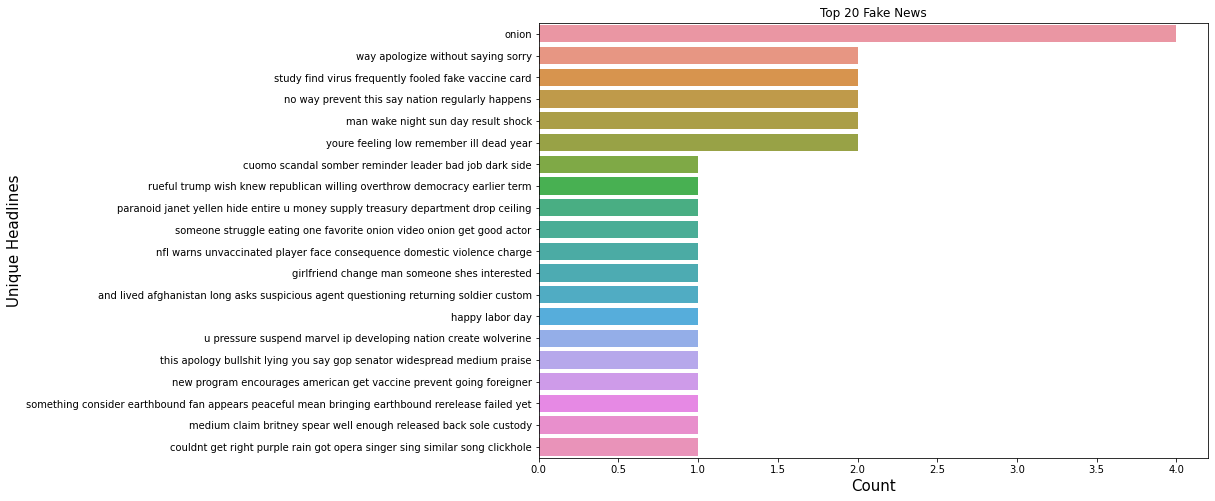

In [47]:
# Look for the popular post for the headlines for fake news

headlines = clean_onion['clean_text'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(headlines.values, headlines.index)
plt.xlabel("Count", fontsize=15)
plt.ylabel("Unique Headlines", fontsize=15)
plt.title("Top 20 Fake News")
plt.show()

The most popular headline in the `r/theonion` is the word of `onion` as there are various post regarding the`onion` company especially there was `The Onion's Guide to the 2021 Oscar` hot topic in the `r/theonion`.

#### __2c.  N-Gram (Unigram, Bigram and Trigram)__

N-grams are continuos sequences of word or symbols or tokens in a document which defined as the neighbouring sequences of items in the corpus. 

To perform this, we'll be using CountVectorizer() to tokenize a collection of text documents and build a vocabulary of known words and encode new documents using that vocabulary. 

In [48]:
# To define function for N-gram analysis

def plot_top_words(df, col, n, n_gram_range, title, palette='tab10'):
    def get_top_n_words(corpus, n=n, k=n_gram_range):     
        vec = CountVectorizer(ngram_range=(k,k), stop_words='english').fit(corpus)     
        bag_of_words = vec.transform(corpus)     
        sum_words = bag_of_words.sum(axis=0)      
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]    
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) 
        return words_freq[:n]
    temp_df = pd.DataFrame(data=get_top_n_words(df[col], n), columns=['word','freq'])
    plt.figure(figsize=(10,6))
    sns.barplot(data=temp_df, y='word', x='freq', palette=palette)
    plt.ylabel('')
    plt.xlabel('')
    plt.title(title, fontsize=18)

__Unigram Top 10__

In [49]:
stop_words = set(CountVectorizer(stop_words = 'english').get_stop_words())

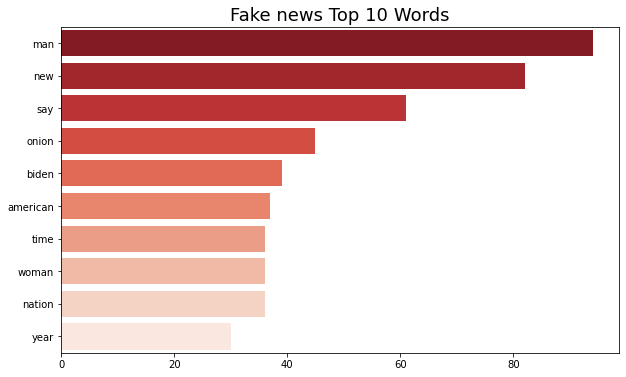

In [50]:
plot_top_words(clean_onion,'lemma_words', 10, 1, 'Fake news Top 10 Words', 'Reds_r')

The word `man` and `new` appear more than 80 counts in the unigram test under the subreddit `r/theonion`.

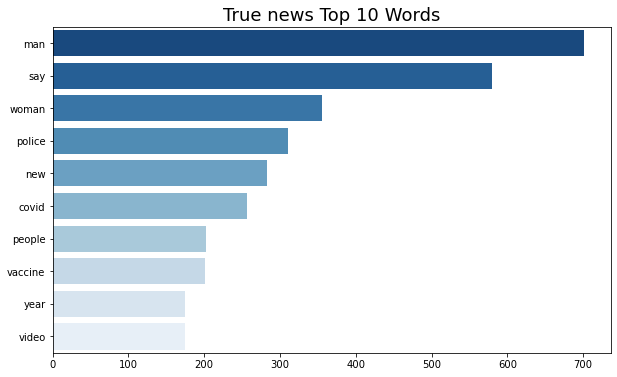

In [51]:
plot_top_words(clean_notonion,'lemma_words', 10, 1, 'True news Top 10 Words', 'Blues_r')

While `man` also appear the most in the `r/nottheonion` in the post during the year 2021. Also, we notice that there are more post of true news compared to the fake news above.

__Bigram Top 10__

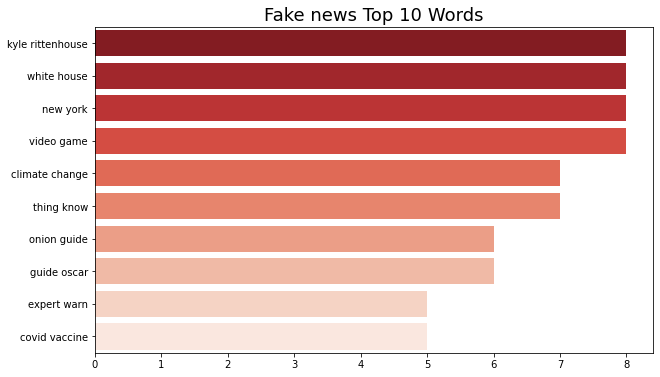

In [52]:
plot_top_words(clean_onion,'lemma_words', 10, 2, 'Fake news Top 10 Words', 'Reds_r')

The word `kyle rittenhouse`,`white house`,`new york` and `video game` appear almost 8 counts in the Bigram test under the subreddit r/theonion.

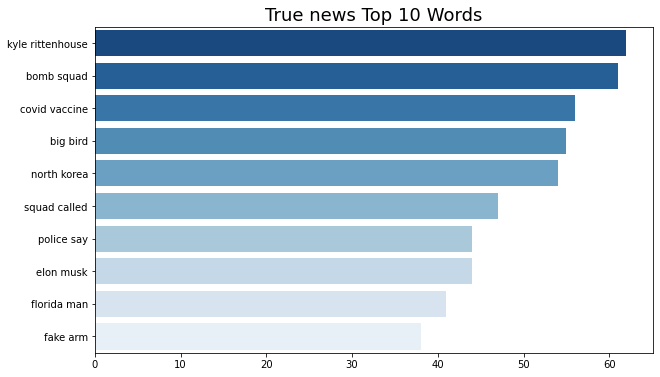

In [53]:
plot_top_words(clean_notonion,'lemma_words', 10, 2, 'True news Top 10 Words', 'Blues_r')

The same word `kyle rittenhouse` also top appearance in the Bigram test under the subreddit r/nottheonion. As this is regarding a shocking news that regarding a 17-year-old boy called Kyle Rittenhouse fatally shot two men and wounded another in Kenosha, Wisconsin. This was hot stories which still in discussion as he is still going to court for the case nowsdays.

__Trigram Top 10__

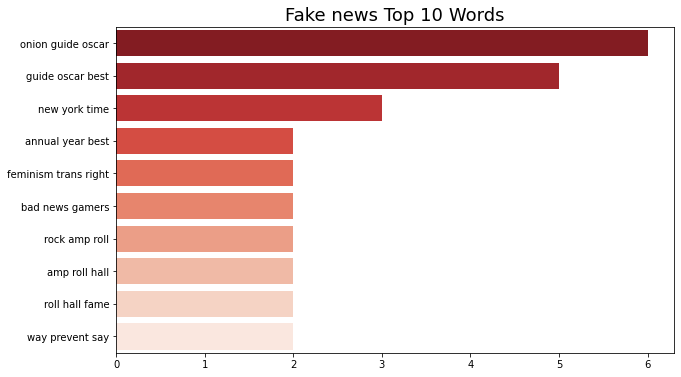

In [54]:
plot_top_words(clean_onion,'lemma_words', 10, 3, 'Fake news Top 10 Words', 'Reds_r')

As what we seen above under the most popular posted headlines for `r/theonion`, the word `oscar` appear frequently as it's pertaining to the topic of `onion guide oscar`.

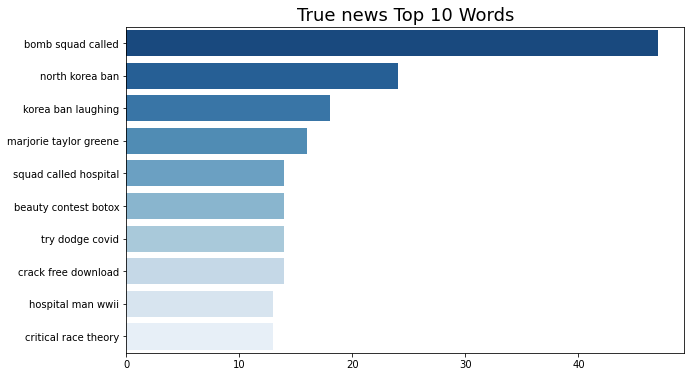

In [55]:
plot_top_words(clean_notonion,'lemma_words', 10, 3, 'True news Top 10 Words', 'Blues_r')

The word `bomb squad called` frequently appear in the `r/nottheonion` as there were always cases in reference to suspicious item in America. Also, `North Korea ban laughing ` also appear to be hot topic in the news posting which the news was dated 20 December 2021 and regarding the North Korea Bans Laughing For 11 Days To Mark Death Anniversary of Kim Jong Un's Father became the hottest news in the subreddit.

#### __2d. WordCloud of Fake and True News__

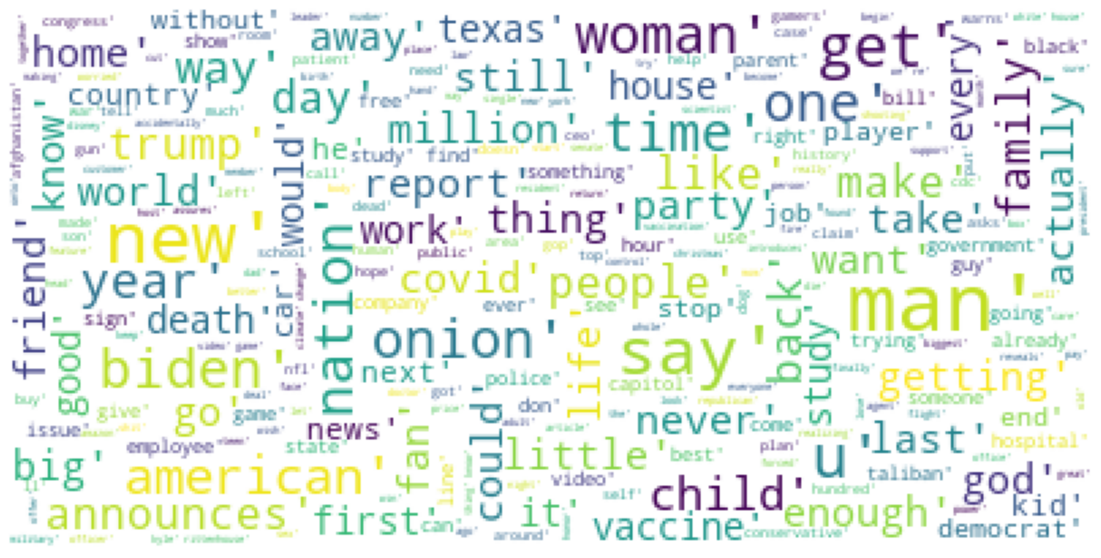

In [56]:
# Generate a basic word cloud for fake news
from wordcloud import WordCloud, ImageColorGenerator

text = " ".join([x for x in clean_onion['lemma_words']])
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=30, max_words=1000, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize= [20,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

As what we can see that the word `man`, `onion` and `woman`are frequent word appear in the subreddit `r/theonion`.

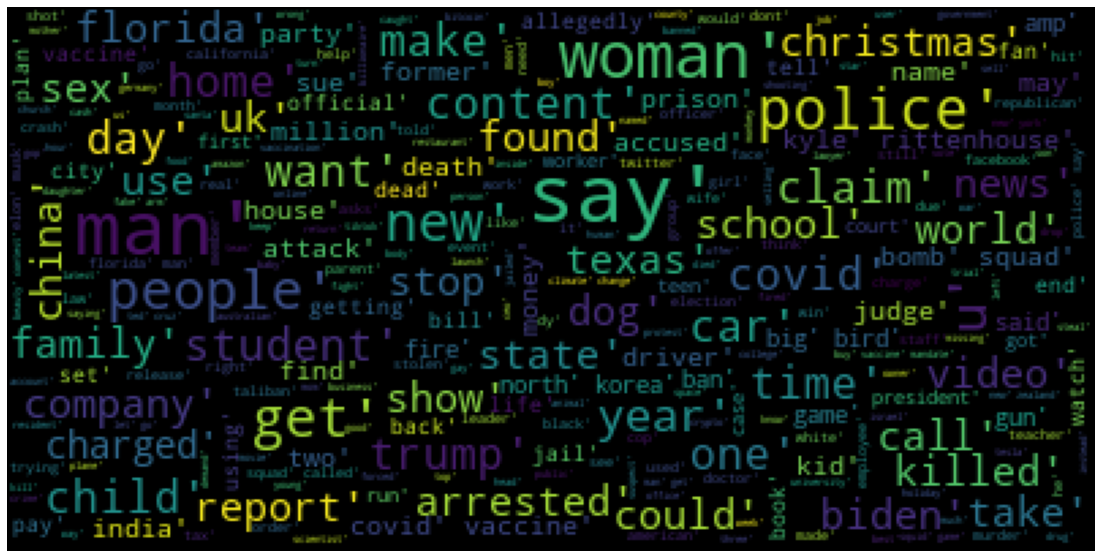

In [57]:
# Generate a basic word cloud for True news
from wordcloud import WordCloud, ImageColorGenerator

text = " ".join([x for x in clean_notonion['lemma_words']])
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=30, max_words=1000).generate(text)

# Display the generated image:
plt.figure(figsize= [20,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

`man` and `women` are the words popular amongst the word cloud which `man` duplicated in these 2 subreddits. 